In [75]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [65]:
def plot_pca(quant_df, title):
    pca = PCA(n_components=2)
    X = normalize(quant_df)
    X_t = pca.fit_transform(X)
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            text=quant_df.index,
            x=X_t[:, 0], y=X_t[:, 1],
            mode='markers',
            marker=dict(size=10, color='red'),
            hovertext=quant_df.index
        )
    )
    fig.update_xaxes(range=[-1.1, 1.1])
    fig.update_yaxes(range=[-1.1, 1.1])
    fig.update_layout(height=800, width=800, title=title)
    return fig

In [72]:
abs_quant_arup = pd.read_csv('absolute_quant_on_panel_arup.csv', index_col=0)
abs_quant_syn = pd.read_csv('absolute_quant_on_panel_syn.csv', index_col=0)

comp_abundance_arup = pd.read_csv('sample_comp_abundance_on_panel_arup.csv', index_col=0)
comp_abundance_arup = comp_abundance_arup * 1e6
quant_arup = pd.concat([abs_quant_arup, abs_quant_syn])
comp_abundance_syn = pd.read_csv('sample_comp_abundance_on_panel_syn.csv', index_col=0)
comp_abundance_syn = comp_abundance_syn * 1e6
quant_syn = pd.concat([comp_abundance_arup, comp_abundance_syn])

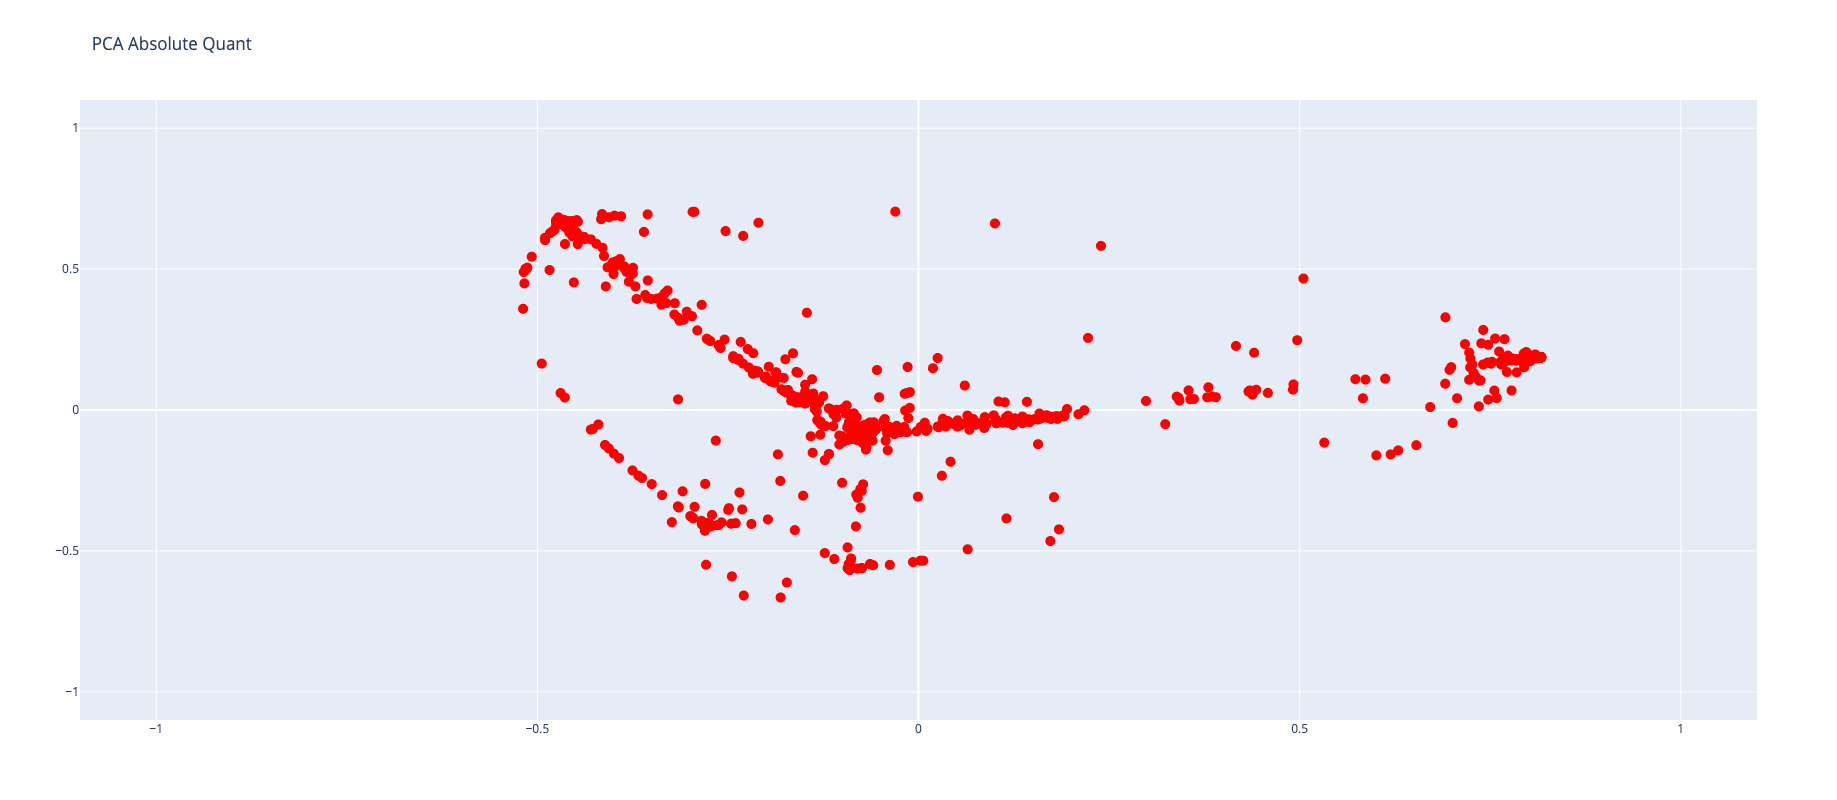

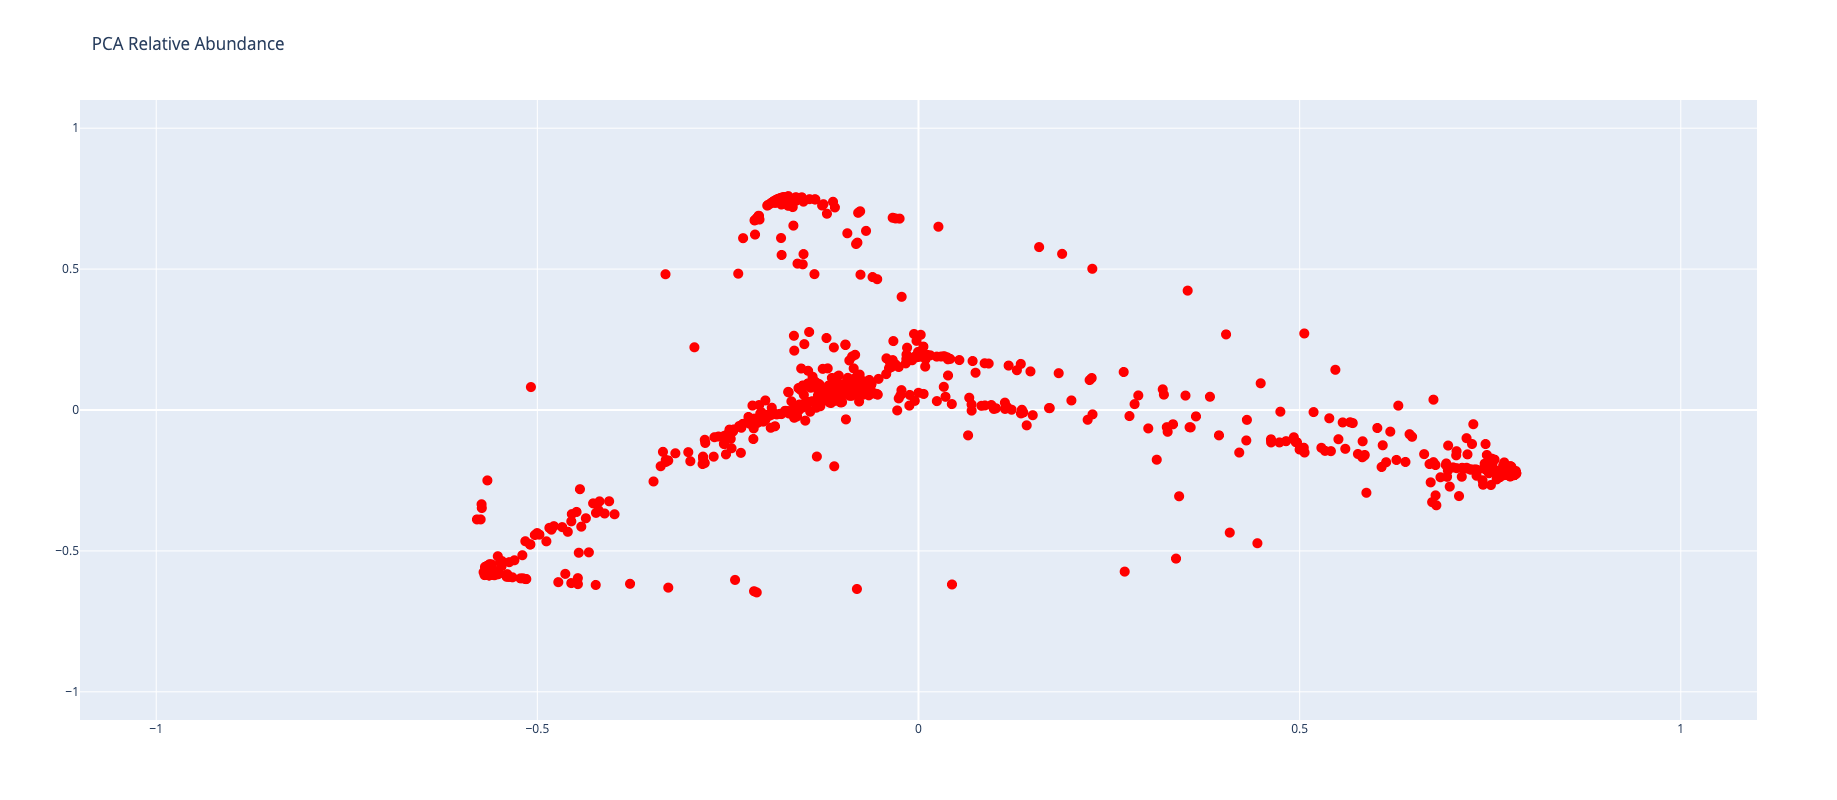

In [85]:
for df, title in zip(
        [quant_arup, quant_syn], 
        ['PCA Absolute Quant', 'PCA Relative Abundance']):
    fig = plot_pca(df, title)
    fig.show()

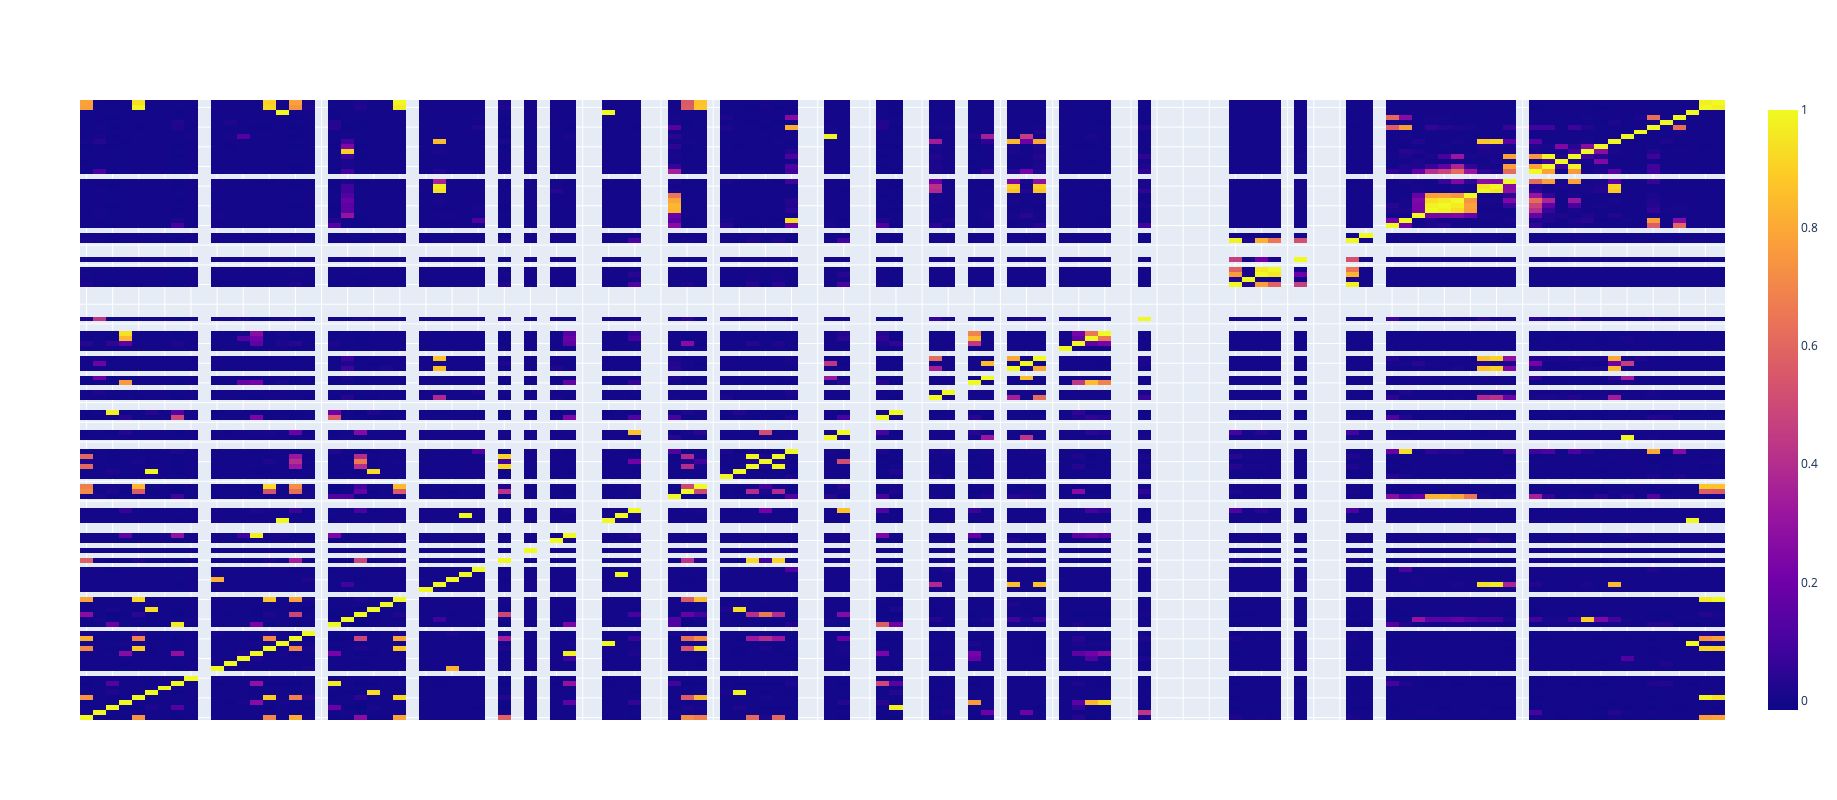

In [81]:
corr_arup = quant_arup.corr()
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x=corr_arup.index,
        y=corr_arup.columns,
        z=corr_arup.values
    )
)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.update_layout(height=800, width=800)